### Ideas

- climate and changes
    - temperature
    - precipitation
    - humidity
- coffee production quantity
- coffee price
    - retail
    - profit for growers
- people employed in coffee growing industry
    - in efforts to keep costs down, what practices might farms use?
        - child labor (https://humantraffickingsearch.org/there-could-be-labor-exploitation-in-your-coffee-cup-heres-how-it-got-there/)
- consumption habits / demand
    - how much coffee people are drinking 
    
1990-2020 ()

TO-DO:
* convert prod_df rows and column switch
* get export prices per year for top 10 countries

We have: 
- production 
    - by top countries
    - global
- us retail price
- change in temp annual
- change in temp from mean

we need:
- export price per country
    - globally
- us demand

Look at: 
coffee quality over time
coffee production losses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Production

In [2]:
# prod_df = pd.read_csv('data/production.csv')
# prod_df.shape

In [3]:
# prod_df.isnull().sum()

### Global Warming

In [4]:
global_warming_df = pd.read_csv('data/FAOSTAT_data_1-10-2022.csv')
global_warming_df.head(3)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data


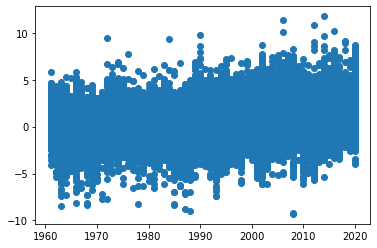

In [5]:
# Visualizing overall global warming trends
plt.scatter(global_warming_df['Year'], global_warming_df['Value']);

In [6]:
# Isolating just Brazil from full countries dataframe:
brazil_climate_change = global_warming_df[global_warming_df['Area'] == 'Brazil'].copy()
brazil_climate_change.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
25432,ET,Temperature change,21,Brazil,7271,Temperature change,7001,January,1961,1961,?C,-0.104,Fc,Calculated data
25433,ET,Temperature change,21,Brazil,7271,Temperature change,7001,January,1962,1962,?C,-0.053,Fc,Calculated data
25434,ET,Temperature change,21,Brazil,7271,Temperature change,7001,January,1963,1963,?C,0.077,Fc,Calculated data
25435,ET,Temperature change,21,Brazil,7271,Temperature change,7001,January,1964,1964,?C,-0.014,Fc,Calculated data
25436,ET,Temperature change,21,Brazil,7271,Temperature change,7001,January,1965,1965,?C,-0.518,Fc,Calculated data


In [7]:
# I don't want the individual monthly change, so just isolating temp change yearly:
brazil_climate_change = brazil_climate_change[brazil_climate_change['Months'] == 'Meteorological year']

In [8]:
# Only looking at years 1990-2020:
brazil_climate_change = brazil_climate_change[brazil_climate_change['Year'] >= 1990]
brazil_climate_change.shape

(31, 14)

In [9]:
# Only need year and temp change:
brazil_climate_change = brazil_climate_change[['Year', 'Value']]
brazil_climate_change.head(3)

,Year,Value
26421,1990,0.440
26422,1991,0.470
26423,1992,0.381


In [10]:
# Renaming column to be in right format and more descriptive:
brazil_climate_change.rename(columns={'Value':'B_temp_change'},inplace=True)

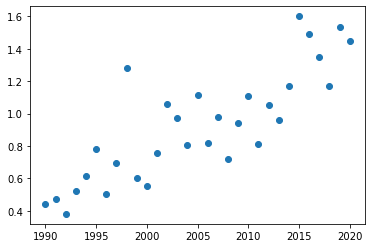

In [11]:
# Quick visual of trends:
plt.scatter(brazil_climate_change['Year'], brazil_climate_change['B_temp_change']);

### Retail Prices:

In [12]:
retail_prices = pd.read_excel('data/3b - retail_prices.xlsx')

In [13]:
# cleaning column names by snakecasing and strpping blankspace
retail_prices.columns = [col.lower().strip().replace(' ','_') 
                         for col in retail_prices.columns]
# shortening usa name
retail_prices.rename(columns={'united_states_of_america':'usa_retail_price'},inplace=True)

In [14]:
retail_prices.head()

,year,austria,belgium,bulgaria,cyprus,czechia,denmark,finland,france,germany,...,slovakia,slovenia,spain,sweden,japan,norway,russian_federation,switzerland,united_kingdom_1,usa_retail_price
0,1990,4.90,3.27,NaN,2.83,NaN,3.81,2.98,3.73,3.99,...,NaN,NaN,3.62,3.43,10.26,3.31,NaN,4.83,10.55,2.97
1,1991,4.57,2.92,NaN,2.80,NaN,3.67,2.72,3.43,3.84,...,NaN,NaN,3.50,3.29,11.88,3.16,NaN,4.36,10.41,2.81
2,1992,4.99,3.05,NaN,2.87,NaN,3.79,2.46,2.31,4.00,...,NaN,NaN,3.50,3.11,12.62,3.12,NaN,4.52,10.09,2.58
3,1993,4.97,2.78,NaN,2.60,NaN,3.48,1.94,2.03,3.62,...,NaN,NaN,2.79,2.65,14.57,2.46,NaN,4.27,8.44,2.47
4,1994,4.58,3.42,NaN,3.18,NaN,4.45,2.73,2.40,4.18,...,NaN,NaN,2.76,3.79,14.69,3.29,NaN,4.50,11.36,3.40


In [15]:
# Isolating just year and retail prices:
us_retail_price = retail_prices[['year', 'usa_retail_price']].copy()
us_retail_price.tail()

,year,usa_retail_price
25,2015,4.720000
26,2016,4.390000
27,2017,4.450000
28,2018,4.300000
29,2019,4.141333


In [16]:
# Renaming column to be in correct format:
us_retail_price.rename(columns={'year': 'Year'}, inplace=True)
us_retail_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              30 non-null     int64  
 1   usa_retail_price  29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


### US Coffee Consumption

In [17]:
us_consumption = pd.read_excel('data/us_coffee_consumption.xlsx')
us_consumption.head(5)

,Coffee Consumption in the US,Unnamed: 1
0,NaN,NaN
1,Date,Thousand Units (Bags of 60 kg)
2,2019,26865.659
3,2018,26514.328
4,2017,26183


In [18]:
# modifying rows to be correct values (removing incorrect info and fixing column names)
us_consumption.drop([0, 1, 32, 33, 34, 35], inplace=True)
us_consumption.columns = ('Year', 'Thousand Units (Bags of 60 kg)')
us_consumption.head()

,Year,Thousand Units (Bags of 60 kg)
2,2019,26865.659
3,2018,26514.328
4,2017,26183
5,2016,25243
6,2015,24438


In [19]:
us_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 2 to 31
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            30 non-null     object
 1   Thousand Units (Bags of 60 kg)  30 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes


In [20]:
# Changing quantity to numeric type
us_consumption['Thousand Units (Bags of 60 kg)'] = pd.to_numeric(us_consumption['Thousand Units (Bags of 60 kg)'])
us_consumption['Year'] = pd.to_numeric(us_consumption['Year'])
us_consumption.describe()

,Year,Thousand Units (Bags of 60 kg)
count,30.000000,30.000000
mean,2004.500000,20994.526633
std,8.803408,2801.853434
min,1990.000000,17326.104000
25%,1997.250000,18682.276000
50%,2004.500000,20820.071500
75%,2011.750000,22184.720750
max,2019.000000,26865.659000


### Green Coffee Net Production Brazil

In [21]:
brazil_grn_coffee = pd.read_excel('data/Brazil/Green Coffee Net Production in Brazil.xlsx')
brazil_grn_coffee.head(3)

,Green Coffee Net Production in Brazil,Unnamed: 1
0,NaN,NaN
1,Date,Thousand US Dollars PPP = 2004–2006
2,2019,3298065.51618


In [22]:
# modifying rows to be correct values (removing incorrect info and fixing column names)
brazil_grn_coffee.drop([0, 1, 61, 62, 63, 64], inplace=True)
brazil_grn_coffee.columns = ('Year', 'B_thousand_USD_grn_coffee_prod')
brazil_grn_coffee.head()

,Year,B_thousand_USD_grn_coffee_prod
2,2019,3298065.51618
3,2018,3252619.81583
4,2017,3206246.65221
5,2016,3243547.63236
6,2015,2844372.39744


In [23]:
brazil_grn_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 2 to 60
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            59 non-null     object
 1   B_thousand_USD_grn_coffee_prod  59 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [24]:
# Changing quantity to numeric type
brazil_grn_coffee['B_thousand_USD_grn_coffee_prod'] = pd.to_numeric(brazil_grn_coffee['B_thousand_USD_grn_coffee_prod'])
brazil_grn_coffee['Year'] = pd.to_numeric(brazil_grn_coffee['Year'])
brazil_grn_coffee.describe()

,Year,B_thousand_USD_grn_coffee_prod
count,59.000000,5.900000e+01
mean,1990.000000,1.948644e+06
std,17.175564,7.589486e+05
min,1961.000000,4.039432e+05
25%,1975.500000,1.376394e+06
50%,1990.000000,1.753197e+06
75%,2004.500000,2.543065e+06
max,2019.000000,3.298066e+06


### Brazil Temp

In [25]:
brazil_temp = pd.read_csv('data/Brazil/observed-average-annual-mean-temperature-of-brazil-for-1901-2021.csv')
brazil_temp.drop(columns='5-yr smooth', inplace=True)
brazil_temp.head()

,Category,Annual Mean
0,1901,24.91
1,1902,25.04
2,1903,24.87
3,1904,24.66
4,1905,24.84


In [26]:
# Renaming category column to be in right formats:
brazil_temp.rename(columns={'Category': 'Year', 'Annual Mean':'B_annual_avg_temp'}, inplace=True)
brazil_temp.head(3)

,Year,B_annual_avg_temp
0,1901,24.91
1,1902,25.04
2,1903,24.87


### Brazil production

In [27]:
brazil_prod = pd.read_csv('data/Brazil/brazil_FAOSTAT_production.csv')
brazil_prod.head(3)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,656,"Coffee, green",1990,1990,ha,2908960,NaN,Official data
1,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,656,"Coffee, green",1991,1991,ha,2763440,NaN,Official data
2,QCL,Crops and livestock products,21,Brazil,5312,Area harvested,656,"Coffee, green",1992,1992,ha,2500320,NaN,Official data


In [28]:
# Isolating just needed columns:
brazil_prod.drop(columns=['Domain Code', 'Domain', 'Area Code (FAO)', 'Item Code (FAO)', 'Year Code', 'Flag'], inplace=True)
brazil_prod.head(3)

,Area,Element Code,Element,Item,Year,Unit,Value,Flag Description
0,Brazil,5312,Area harvested,"Coffee, green",1990,ha,2908960,Official data
1,Brazil,5312,Area harvested,"Coffee, green",1991,ha,2763440,Official data
2,Brazil,5312,Area harvested,"Coffee, green",1992,ha,2500320,Official data


In [29]:
brazil_prod.Element.unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [30]:
# Splitting vertical dataframe into three sections so I can get the columns arranged
# Dropping unnecessary columns and renaming to correct format:

area_harvested = brazil_prod[brazil_prod['Element'] == 'Area harvested'].copy()
area_harvested.drop(columns=['Area', 'Element Code', 'Element', 
                             'Item', 'Flag Description', 'Unit'], inplace=True)
area_harvested.columns = ['Year', 'B_hectares_harvested']
area_harvested.head()

,Year,B_hectares_harvested
0,1990,2908960
1,1991,2763440
2,1992,2500320
3,1993,2259330
4,1994,2097650


In [31]:
# Same as above:

yields = brazil_prod[brazil_prod['Element'] == 'Yield'].copy()
yields.drop(columns=['Area', 'Element Code', 'Element', 'Item', 'Flag Description', 'Unit'], inplace=True)
yields.columns = ['Year', 'B_hectograms_per_hectare_yield']
yields.tail()

,Year,B_hectograms_per_hectare_yield
57,2016,15148
58,2017,14894
59,2018,19060
60,2019,16500
61,2020,19493


In [32]:
# Same as above two

brazil_production = brazil_prod[brazil_prod['Element'] == 'Production'].copy()
brazil_production.drop(columns=['Area', 'Element Code', 'Element', 'Item', 'Flag Description', 'Unit'], inplace=True)
brazil_production.columns = ['Year', 'B_tonnes_produced']
brazil_production.head()

,Year,B_tonnes_produced
62,1990,1464856
63,1991,1520382
64,1992,1294373
65,1993,1278759
66,1994,1307289


## Merging:

In [33]:
first = pd.merge(area_harvested, yields, how='outer', on='Year')
first.tail(3)

,Year,B_hectares_harvested,B_hectograms_per_hectare_yield
28,2018,1863966,19060
29,2019,1825283,16500
30,2020,1898239,19493


In [34]:
second = pd.merge(first, brazil_production, how='outer', on='Year')
second.tail(3)

,Year,B_hectares_harvested,B_hectograms_per_hectare_yield,B_tonnes_produced
28,2018,1863966,19060,3552729
29,2019,1825283,16500,3011745
30,2020,1898239,19493,3700231


In [35]:
retail_consumption = pd.merge(us_retail_price, us_consumption, how='outer', on='Year')
retail_consumption.tail(3)

,Year,usa_retail_price,Thousand Units (Bags of 60 kg)
27,2017,4.450000,26183.000
28,2018,4.300000,26514.328
29,2019,4.141333,26865.659


In [36]:
retail_consump_grn = pd.merge(retail_consumption, brazil_grn_coffee, on='Year')
retail_consump_grn.tail(3)

,Year,usa_retail_price,Thousand Units (Bags of 60 kg),B_thousand_USD_grn_coffee_prod
27,2017,4.450000,26183.000,3.206247e+06
28,2018,4.300000,26514.328,3.252620e+06
29,2019,4.141333,26865.659,3.298066e+06


In [37]:
all_four = pd.merge(retail_consump_grn, brazil_temp, on='Year')
all_four.tail(3)

,Year,usa_retail_price,Thousand Units (Bags of 60 kg),B_thousand_USD_grn_coffee_prod,B_annual_avg_temp
27,2017,4.450000,26183.000,3.206247e+06,25.77
28,2018,4.300000,26514.328,3.252620e+06,25.59
29,2019,4.141333,26865.659,3.298066e+06,25.94


In [38]:
brazil_df = pd.merge(second, all_four, how='outer', on='Year')
brazil_df.head()

,Year,B_hectares_harvested,B_hectograms_per_hectare_yield,B_tonnes_produced,usa_retail_price,Thousand Units (Bags of 60 kg),B_thousand_USD_grn_coffee_prod,B_annual_avg_temp
0,1990,2908960,5036,1464856,2.97,18297.617,1.573783e+06,25.12
1,1991,2763440,5502,1520382,2.81,18661.180,1.633438e+06,25.05
2,1992,2500320,5177,1294373,2.58,18290.453,1.390623e+06,24.91
3,1993,2259330,5660,1278759,2.47,19217.137,1.373848e+06,25.02
4,1994,2097650,6232,1307289,3.40,17326.104,1.404499e+06,25.14


In [39]:
brazil_df = pd.merge(brazil_df, brazil_climate_change, on='Year')

In [40]:
brazil_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            31 non-null     int64  
 1   B_hectares_harvested            31 non-null     int64  
 2   B_hectograms_per_hectare_yield  31 non-null     int64  
 3   B_tonnes_produced               31 non-null     int64  
 4   usa_retail_price                29 non-null     float64
 5   Thousand Units (Bags of 60 kg)  30 non-null     float64
 6   B_thousand_USD_grn_coffee_prod  30 non-null     float64
 7   B_annual_avg_temp               30 non-null     float64
 8   B_temp_change                   31 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 2.4 KB


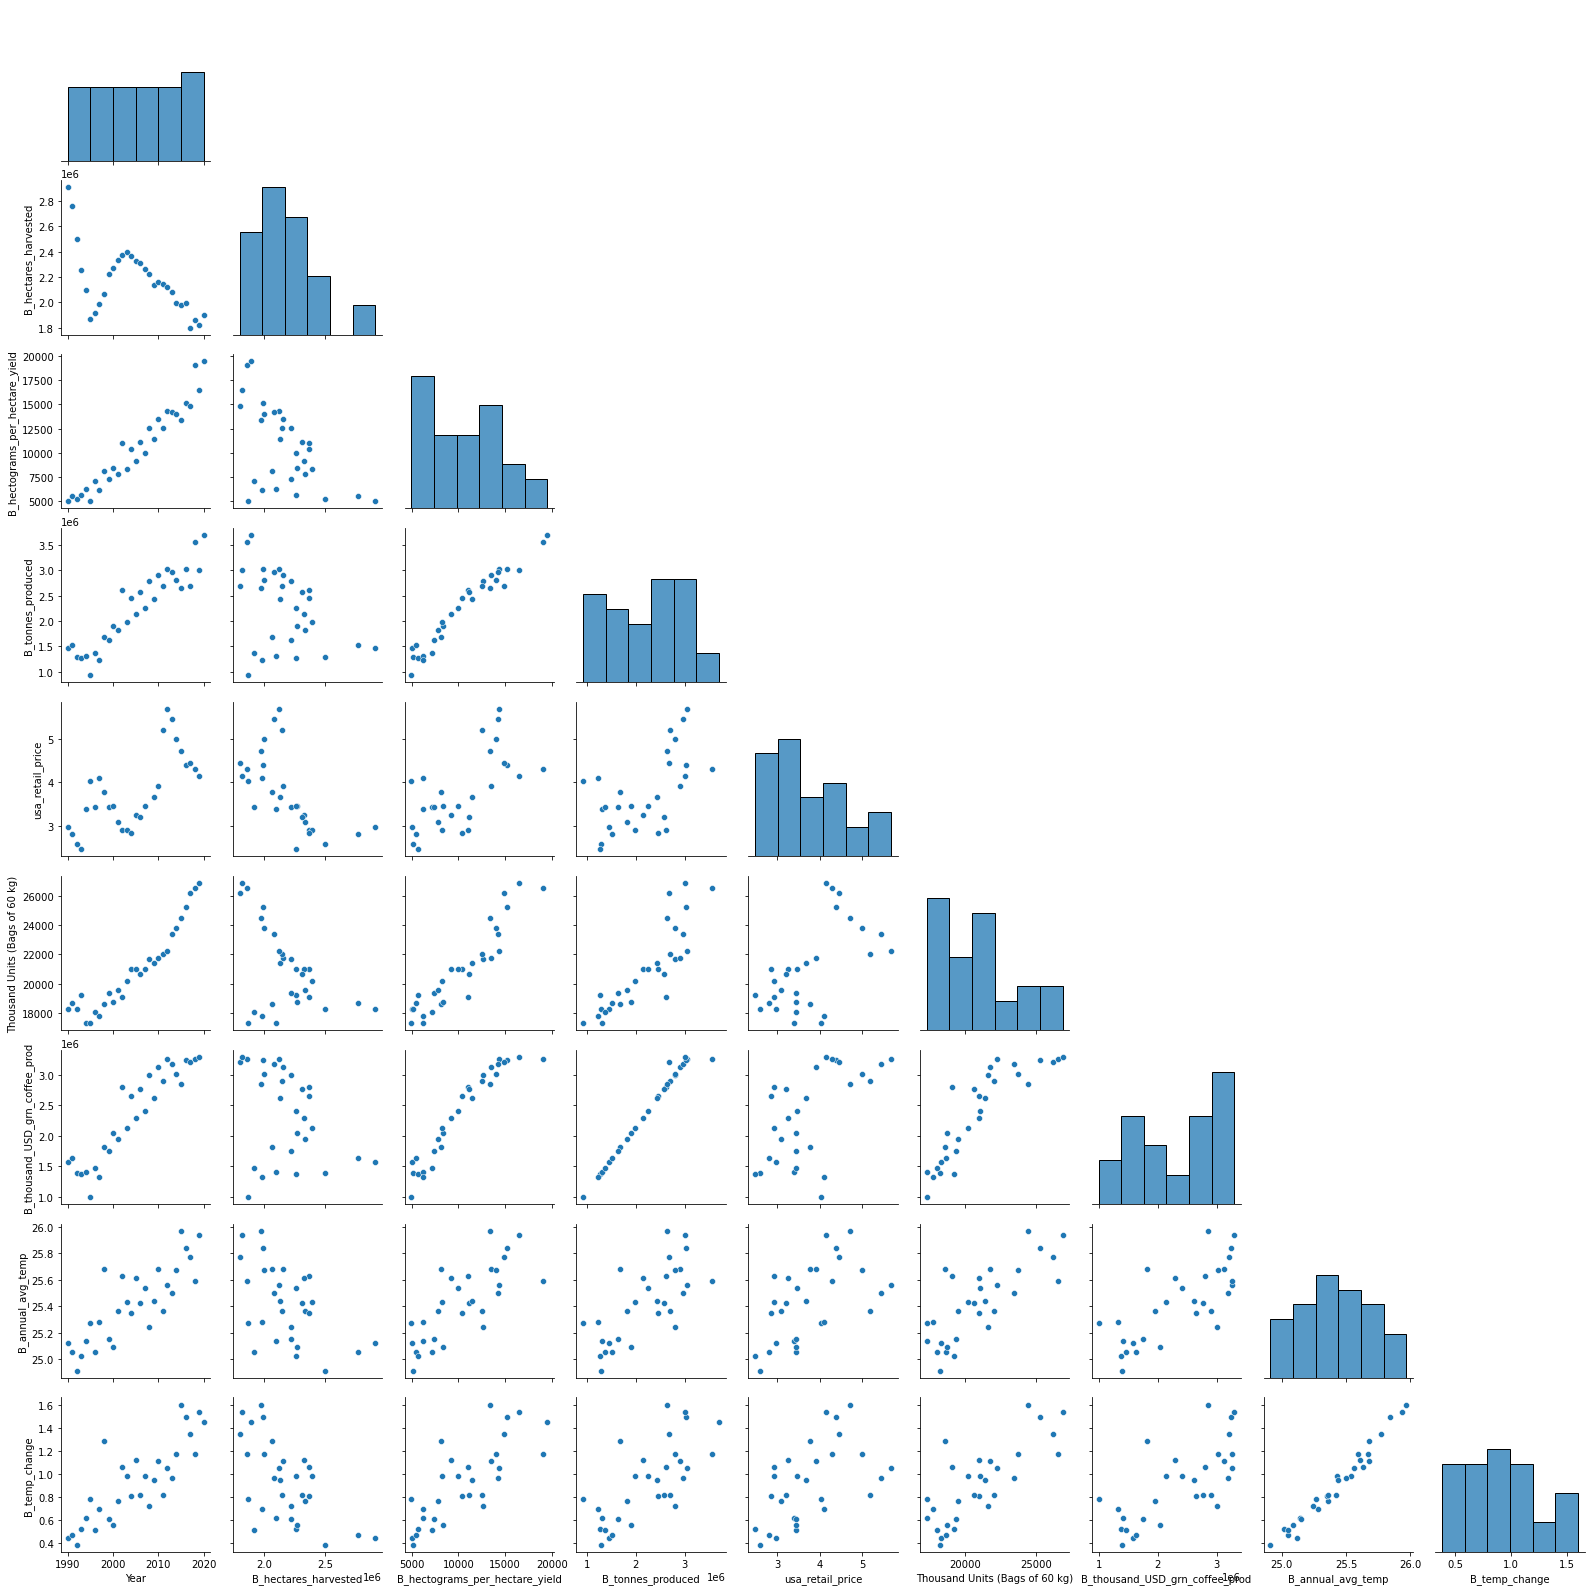

In [41]:
sns.pairplot(brazil_df, corner=True);

In [42]:
brazil_df.columns

Index(['Year', 'B_hectares_harvested', 'B_hectograms_per_hectare_yield',
       'B_tonnes_produced', 'usa_retail_price',
       'Thousand Units (Bags of 60 kg)', 'B_thousand_USD_grn_coffee_prod',
       'B_annual_avg_temp', 'B_temp_change'],
      dtype='object')

In [43]:
# *Commenting out to prevent accidently running and rewriting*

# brazil_df.to_csv('./data/brazil_df.csv', index=False)

SOURCES:

us_coffee_consumption - https://www.nationmaster.com/nmx/ranking/coffee-consumption

brazil green coffee net production - https://www.nationmaster.com/nmx/timeseries/brazil-green-coffee-net-production

brazil weather - https://climateknowledgeportal.worldbank.org/country/brazil/climate-data-historical

brazil production more detailed - https://www.fao.org/faostat/en/#data/QCL


In [43]:
cleaned_merged_df = pd.read_csv('./data/cleaned_merged_df.csv')
cleaned_merged_df.head()

,year,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,col_production_lbs,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change
0,1990,2908960,5036,1464856,2.97,25.12,31671200.0,0.258,0.66,2909.451,0.244,1074.101,1200.0,40254757.4,24.77,0.440
1,1991,2763440,5502,1520382,2.81,25.05,39556873.4,0.347,0.53,2924.664,0.244,841.329,1264.0,41054596.0,24.82,0.470
2,1992,2500320,5177,1294373,2.58,24.91,32883131.6,0.532,0.25,1825.171,0.244,734.461,1331.0,40238996.6,24.95,0.381
3,1993,2259330,5660,1278759,2.47,25.02,25129328.4,0.157,0.36,2967.004,0.244,1166.778,1402.0,42277701.4,24.80,0.522
4,1994,2097650,6232,1307289,3.40,25.14,28520800.0,0.162,0.49,2762.730,0.599,1475.325,1476.0,38117428.8,24.77,0.612


In [44]:
cleaned_merged_df['b_annual_celsius_change'] = brazil_df['B_temp_change']
cleaned_merged_df.head()

,year,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,col_production_lbs,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change
0,1990,2908960,5036,1464856,2.97,25.12,31671200.0,0.258,0.66,2909.451,0.244,1074.101,1200.0,40254757.4,24.77,0.440
1,1991,2763440,5502,1520382,2.81,25.05,39556873.4,0.347,0.53,2924.664,0.244,841.329,1264.0,41054596.0,24.82,0.470
2,1992,2500320,5177,1294373,2.58,24.91,32883131.6,0.532,0.25,1825.171,0.244,734.461,1331.0,40238996.6,24.95,0.381
3,1993,2259330,5660,1278759,2.47,25.02,25129328.4,0.157,0.36,2967.004,0.244,1166.778,1402.0,42277701.4,24.80,0.522
4,1994,2097650,6232,1307289,3.40,25.14,28520800.0,0.162,0.49,2762.730,0.599,1475.325,1476.0,38117428.8,24.77,0.612


In [46]:
# *Commenting out to prevent accidently running and rewriting*

# cleaned_merged_df.to_csv('./data/cleaned_merged_df.csv', index=False)

In [46]:
updated = pd.read_csv('./data/cleaned_merged_df2.csv')

In [47]:
updated.head()

,Unnamed: 0,year,ind_annual_celcsius_change,ind_avg_temp_celsius,ind_prod_lbs,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,col_production_lbs,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change
0,0,1990,0.120,25.43,16371042.6,2908960,5036,1464856,2.97,25.12,31671200.0,0.258,0.66,2909.451,0.244,1074.101,1200.0,40254757.4,24.77,0.440
1,1,1991,0.203,25.32,18685031.2,2763440,5502,1520382,2.81,25.05,39556873.4,0.347,0.53,2924.664,0.244,841.329,1264.0,41054596.0,24.82,0.470
2,2,1992,0.264,25.28,12252851.6,2500320,5177,1294373,2.58,24.91,32883131.6,0.532,0.25,1825.171,0.244,734.461,1331.0,40238996.6,24.95,0.381
3,3,1993,0.206,25.17,14835233.6,2259330,5660,1278759,2.47,25.02,25129328.4,0.157,0.36,2967.004,0.244,1166.778,1402.0,42277701.4,24.80,0.522
4,4,1994,0.267,25.25,11809331.6,2097650,6232,1307289,3.40,25.14,28520800.0,0.162,0.49,2762.730,0.599,1475.325,1476.0,38117428.8,24.77,0.612
